In [1]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from math import exp,log
import pandas as pd
import numpy as np
import copy

In [2]:
data = pd.read_csv(r"C:\Users\Narahc\Downloads\exam.csv")
# data = shuffle(data) 
data.insert(loc=0,column='bias',value=np.ones([data.shape[0],1]))
# data.insert(loc=3,column='X1_2',value=(data['exam1']*data['exam1']))
# data.insert(loc=4,column='X2_2',value=(data['exam2']*data['exam2']))
# data.insert(loc=3,column='X1X2',value=(data['exam1']*data['exam2']))
print(data.head())
inp = data.iloc[:,0:-1]
outp = data.iloc[:,-1:]
train_data, train_label = inp.iloc[:(int)(inp.shape[0]*.7),:] , outp.iloc[:(int)(inp.shape[0]*.7),:] 
test_data, test_label = inp.iloc[(int)(inp.shape[0]*.7):,:] , outp.iloc[(int)(inp.shape[0]*.7):,:] 
# test_data.shape

   bias      exam1      exam2  result
0   1.0  34.623660  78.024693       0
1   1.0  30.286711  43.894998       0
2   1.0  35.847409  72.902198       0
3   1.0  60.182599  86.308552       1
4   1.0  79.032736  75.344376       1


In [3]:
def sig(X):
    return 1/(1+exp(-X))
vsig=np.vectorize(sig)

def logg(X):
    return log(X)
vlog=np.vectorize(logg)

def cost(H,Y):
    return -(1/len(Y))*(sum(Y*vlog(H)+(1-Y)*vlog(1-H)))

In [4]:
def gradient_descent(X,Y,W,epochs,learning_rate,lamb):
    act_Y = Y.reshape(len(Y))
    cos=[]
    for i in range(epochs):
        h_x=vsig(X.dot(W))
        cos.append(cost(h_x,act_Y))
        regul = W*lamb
        regul[0] = 0
        gradient=X.T.dot(h_x-act_Y) - regul
        W=W-(learning_rate/len(Y))*(gradient)
    return W,cos

(70, 3)
(70, 1)
(3,)
0.2211087572819281


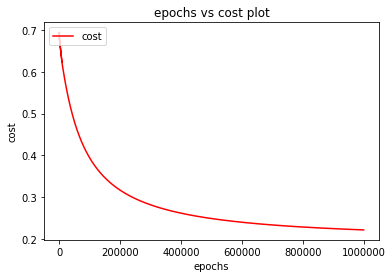

In [5]:
W = np.zeros([inp.shape[1]])
X = np.array(train_data)
Y = np.array(train_label)
print(X.shape)
print(Y.shape)
print(W.shape)
learning_rate = 1e-3
epochs = 1000000
lamb = 0
W,cos=gradient_descent(X,Y,W,epochs,learning_rate,lamb)
x=[i for i in range(epochs)]
print(cos[-1])
plt.plot(x,cos,'-r',label ='cost')
plt.title('epochs vs cost plot')
plt.legend(loc='upper left')
plt.xlabel('epochs')
plt.ylabel('cost')
# plt.plot(x,cos,'-r')
plt.show()

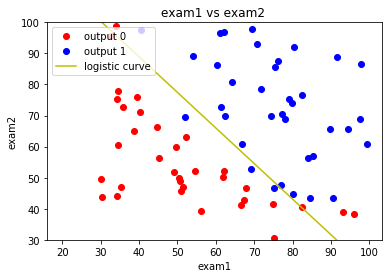

In [6]:
x0 = []
x1 = []
y0 = []
y1 = []
for i in range(len(X)):
  if Y[i]==0:
    x0.append(X[i][1])
    y0.append(X[i][2])
  else:
    x1.append(X[i][1])
    y1.append(X[i][2])
plt.plot(x0,y0,'ro',label ='output 0')
plt.plot(x1,y1,'bo',label ='output 1')
x = np.arange(20,100,1)
plt.ylim(30,100)
plt.xlabel('exam1')
plt.ylabel('exam2')
y = -(W[0] + W[1]* x)/(W[2])
plt.plot(x,y,'-y',label ='logistic curve')
plt.title('exam1 vs exam2 ')
plt.legend(loc='upper left')
plt.show()

In [7]:
print(" Weights we got : ", W)
X = np.array(test_data)
Y = np.array(test_label)

prediction = np.round(vsig(X.dot(W)))
print("Total test samples : ",len(Y))
print("Wrongly predicticed test samples : ",sum(abs(prediction-Y.reshape(len(Y)))))
print("Accuracy : ",(1-sum(abs(prediction-Y.reshape(len(Y))))/len(Y))*100)

 Weights we got :  [-15.90210222   0.13522939   0.11802759]
Total test samples :  30
Wrongly predicticed test samples :  4.0
Accuracy :  86.66666666666667


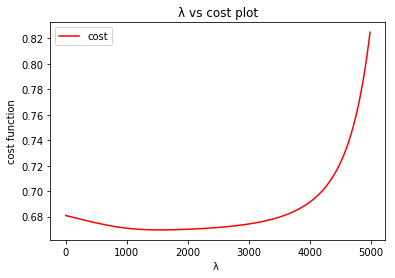

In [15]:
X = np.array(train_data)
Y = np.array(train_label)
testX = np.array(train_data)
testY = np.array(train_label)
l_cos = []
ac_cos =[]
x = []
learning_rate = 1e-3
epochs = 100
for i in range(0,5000,10):
    W = np.zeros([inp.shape[1]])
    W,cos=gradient_descent(X,Y,W,epochs,learning_rate,i)
    x.append(i)
    h_x=vsig(testX.dot(W))
#     cos.append(cost(h_x,testY))
    l_cos.append(cost(h_x,testY.reshape(len(testY))))
plt.plot(x,l_cos,'-r',label ='cost')
plt.title('λ vs cost plot')
plt.legend(loc='upper left')
plt.xlabel('λ ')
plt.ylabel('cost function')
plt.show()